# Fashion Recognizer with CNN using tensorflow

Revealing file directories

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


The total deep learning or machhine learning project can be done in following steps :

         1. Importing required libraries.
         2. Reading the data and primary visualization
         3. Preprocessing
         4. Creating X and y
         5. Model Generation
         6. Training / Fitting model with data
         7. Model evaluation
         8. Creating prediction data
         9. Accuracy checking 
                           

## Libraries

In [2]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow : ',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

version of tensorflow :  2.3.1


In [3]:
# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

## Reading the data and primary visualization

In [4]:
train=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(60000, 785)

In [7]:
test=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.shape

(10000, 785)

## Preprocessing

As we have taken the train and test data in dataframe we have to change them into numpy ndarray for fitting in tensorflow framework.

The data is not shaped properly to feed through the CNN layers. So we also have to reshape the data.

Before that we have to split the X and Y of the datas.

In [10]:
X_train=train.drop('label',1)
y_train=train['label']

In [11]:
X_train=X_train.to_numpy()

In [12]:
X_train=X_train.reshape(60000,28,28,1)

In [13]:
X_test=test.drop('label',1)
y_test=test['label']

In [14]:
X_test=X_test.to_numpy()
X_test=X_test.reshape(10000,28,28,1)

In [15]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

**Just for visualization :** we can see the first image and and check it's original label.
(As the data is now in 4-d form we have to reshape it for visualization.

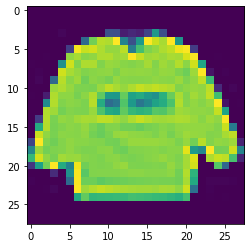

In [16]:
plt.imshow(X_train[0].reshape(28,28))

In [17]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
labels[y_train[0]]

'Pullover'

We have created this array for better understanding .

You can use the word **decoder** of it.

As we preprocessed the data we have to normalize the values of the train and test for better prediction.

In [19]:
X_train=X_train/255.0
X_test=X_test/255.0

## Model generation

As we are making a CNN model for image classification so, we are using **2D ConvNet**

In [20]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))  #in first layer we have to feed the input shape.
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))           # dropout reduces the number of functional neurons.

model.add(Flatten())                   # after convnet layers we have to flatten the model to create actual prediction.
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))          # In this step we have used a softmax function to predict classes.

As we have created our model we can see the summary of it.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

We are compiling our model with *adam* optimizer and as this is a multiclass classification we are using the *sparse categorical cross entropy* as loss function.

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Now we have achieved to the most interesting part of the whole project.

We are storing the whole prediction in **hist** for model evaluation.

In [23]:
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=1)   
# validation data can indicate overfitting or underfitting of the model.

Epoch 1/10
469/469 [==============================] - 71s 152ms/step - loss: 0.5288 - accuracy: 0.8116 - val_loss: 0.3159 - val_accuracy: 0.8883
Epoch 2/10
469/469 [==============================] - 71s 152ms/step - loss: 0.3481 - accuracy: 0.8775 - val_loss: 0.2693 - val_accuracy: 0.9003
Epoch 3/10
469/469 [==============================] - 71s 151ms/step - loss: 0.2970 - accuracy: 0.8935 - val_loss: 0.2496 - val_accuracy: 0.9064
Epoch 4/10
469/469 [==============================] - 72s 154ms/step - loss: 0.2656 - accuracy: 0.9037 - val_loss: 0.2224 - val_accuracy: 0.9180
Epoch 5/10
469/469 [==============================] - 73s 155ms/step - loss: 0.2418 - accuracy: 0.9125 - val_loss: 0.2153 - val_accuracy: 0.9187
Epoch 6/10
469/469 [==============================] - 71s 151ms/step - loss: 0.2208 - accuracy: 0.9181 - val_loss: 0.2096 - val_accuracy: 0.9224
Epoch 7/10
469/469 [==============================] - 72s 153ms/step - loss: 0.2056 - accuracy: 0.9253 - val_loss: 0.2003 - val_ac

So, the model fitting took almost 30 minutes. and after that we can see the we have reached a train accuracy of 94% and validation accuracy of 93%.



## Model Evaluation

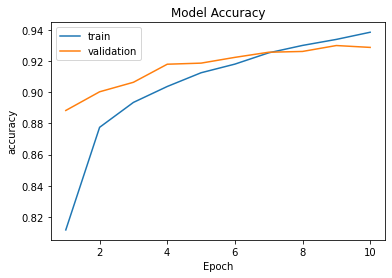

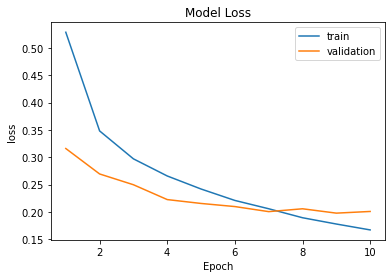

In [24]:
plt.title('Model Accuracy')
plt.plot(range(1,11),hist.history['accuracy'])
plt.plot(range(1,11),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,11),hist.history['loss'])
plt.plot(range(1,11),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

After visualizaing the accuracy and loss digram of both train and validation data we can see the model is slightly overfitted. and it is visible that the best accuracy for training and validation data is on **9th epoch**.

## Creating prediction data

In [25]:
y_pr=model.predict(X_test)

In [26]:
y_pr

array([[9.99814808e-01, 5.67723863e-12, 5.25242342e-07, ...,
        5.96070705e-14, 3.12634008e-09, 1.99540651e-14],
       [1.40153752e-12, 1.00000000e+00, 1.37242729e-13, ...,
        2.65611215e-16, 2.19604472e-14, 2.86638199e-16],
       [4.52629570e-03, 3.14949578e-09, 9.49565649e-01, ...,
        2.34796102e-12, 2.22605266e-07, 7.50733753e-10],
       ...,
       [2.91497707e-16, 1.04503643e-16, 2.16628491e-16, ...,
        1.31636146e-16, 1.00000000e+00, 1.09093096e-17],
       [3.55077418e-07, 3.56274410e-09, 4.62134914e-11, ...,
        3.81648567e-11, 9.99999166e-01, 5.69339313e-08],
       [1.21401019e-04, 9.98702407e-01, 3.39786493e-05, ...,
        1.02638637e-06, 7.75786611e-06, 9.22465097e-06]], dtype=float32)

as we can see the prediction of each image is sequence of values. So wee need to use argmax for getting the actual prediction.

In [27]:
y_pred=[]
for i in range(len(y_pr)):
  y_pred.append(np.argmax(y_pr[i]))

In [28]:
for i in range(5):
    print(y_pred[i])

0
1
2
2
3


So, now after getting the prediction we can check if it is really giving accurate predictions or not.

prediction of the image :  T-shirt/top
actual image :


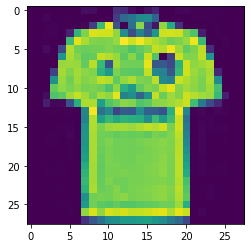

prediction of the image :  Trouser
actual image :


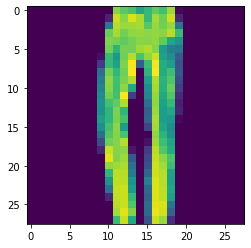

prediction of the image :  Pullover
actual image :


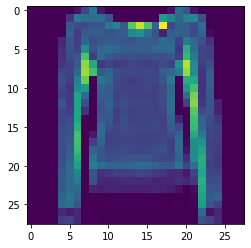

prediction of the image :  Pullover
actual image :


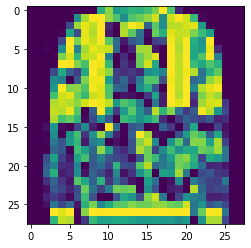

prediction of the image :  Dress
actual image :


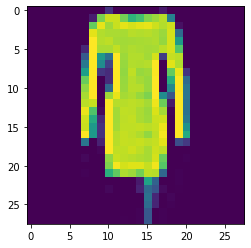

In [29]:
for i in range(5):
  print('prediction of the image : ',labels[y_pred[i]])
  print('actual image :')
  plt.imshow(X_test[i].reshape(28,28))
  plt.show()

So, the predictions are quite good. So, the model is quite effective to the dataset.

## Accuracy checking

In [30]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[861,   0,  16,  10,   0,   2, 106,   0,   5,   0],
       [  3, 988,   1,   7,   0,   0,   1,   0,   0,   0],
       [ 15,   1, 913,   8,  27,   0,  36,   0,   0,   0],
       [ 10,   5,   7, 935,  19,   0,  24,   0,   0,   0],
       [  2,   1,  56,  19, 879,   0,  43,   0,   0,   0],
       [  0,   0,   0,   0,   0, 981,   0,  13,   1,   5],
       [ 77,   1,  52,  19,  41,   0, 807,   0,   3,   0],
       [  0,   0,   0,   0,   0,   3,   0, 963,   0,  34],
       [  1,   0,   2,   1,   2,   2,   7,   1, 984,   0],
       [  0,   0,   0,   0,   0,   1,   0,  22,   0, 977]])

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98cf06af50>)

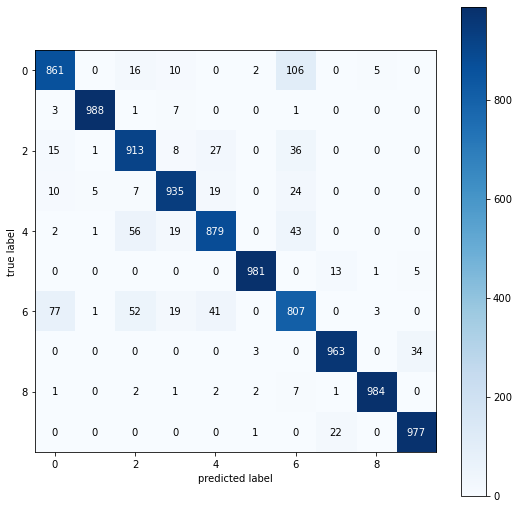

In [31]:
plot_confusion_matrix(mat,figsize=(9,9),colorbar=True)

After plotting the confusion matrixes we can see that the model is well tuned for image classification of those fashion types.Moreover *Tshirt/top* quite resembles with *shirt* what actually should happen.

### Hurrah ! We've completed a whole image classification project using CNN model with tensorflow framework :)

#### UPVOTE if you like this kernel :)

At last but not the least you can visit my other works on [github](https://github.com/sagnik1511?tab=repositories) , [Kaggle](https://www.kaggle.com/sagnik1511)

***THANK YOU***

# THE END